In [1]:
from Params.path_params import Data_path
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
jdata_path = "{0}/JData".format(Data_path)

In [4]:
login_train_file = "{0}/t_login.csv".format(jdata_path)
login_test_file = "{0}/t_login_test.csv".format(jdata_path)

In [5]:
trade_train_file = "{0}/t_trade.csv".format(jdata_path)
trade_test_file = "{0}/t_trade_test.csv".format(jdata_path)

In [6]:
trade_train = pd.read_csv(trade_train_file)

In [7]:
trade_train.shape

(132719, 4)

In [8]:
trade_train.groupby('id')['rowkey'].nunique().max()

1095

In [8]:
trade_train.head(10)

,rowkey,time,id,is_risk
0,3,2015-01-01 00:00:41.0,27863,0
1,6,2015-01-01 00:00:46.0,115201,0
2,13,2015-01-01 00:01:02.0,143711,0
3,32,2015-01-01 00:03:00.0,172699,0
4,43,2015-01-01 00:03:52.0,53265,0
5,67,2015-01-01 00:05:51.0,18231,0
6,94,2015-01-01 00:10:12.0,147174,0
7,98,2015-01-01 00:10:48.0,141674,0
8,116,2015-01-01 00:13:16.0,105324,0
9,147,2015-01-01 00:19:07.0,168749,0


In [9]:
trade_train.rowkey.unique().shape[0]

132719

In [10]:
trade_train.id.unique().shape[0]

26044

In [11]:
trade_train.dtypes

rowkey      int64
time       object
id          int64
is_risk     int64
dtype: object

In [12]:
trade_train[trade_train.time.isnull()]

,rowkey,time,id,is_risk


In [ ]:
trade_train.groupby('id').agg({'rowkey':'nunique'}).reset_index().iloc[8066]

In [23]:
tf = trade_train.groupby('id').agg({'rowkey':'nunique'}).reset_index()

In [26]:
tf.loc[tf.rowkey >= 10]

,id,rowkey
7,41,11
16,122,17
22,180,20
24,228,11
34,305,22
58,464,35
73,551,12
88,669,10
100,756,14
109,812,14


In [13]:
trade_train['time'] =pd.to_datetime(trade_train['time'], utc=True)

In [46]:
trade_train.is_risk.value_counts(normalize=True)

0    0.972551
1    0.027449
Name: is_risk, dtype: float64

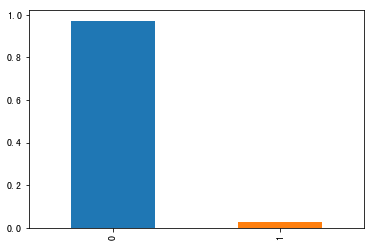

In [45]:
trade_train.is_risk.value_counts(normalize=True).plot(kind='bar')

In [14]:
groups = [pd.TimeGrouper('1D')]

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  if __name__ == '__main__':


In [15]:
df = trade_train.set_index('time')

In [16]:
df_g = df.groupby(groups).agg({'id':'nunique','rowkey':'nunique'})

In [17]:
df_g.head()

,id,rowkey
time,,
2015-01-01 00:00:00+00:00,550,810
2015-01-02 00:00:00+00:00,548,818
2015-01-03 00:00:00+00:00,593,818
2015-01-04 00:00:00+00:00,660,920
2015-01-05 00:00:00+00:00,609,928


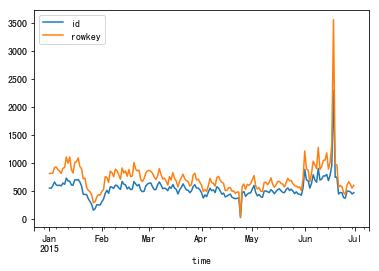

In [18]:
df_g.plot()

观测一下测试数据集上的周期性

In [19]:
trade_test = pd.read_csv(trade_test_file)

In [20]:
trade_test.shape

(17875, 3)

In [21]:
trade_test.columns[trade_test.isnull().any()]

Index([], dtype='object')

In [22]:
trade_test.rowkey.unique().shape[0]

17875

In [23]:
trade_test.id.unique().shape[0]

7272

In [24]:
trade_test['time'] =pd.to_datetime(trade_test['time'], utc=True)

In [25]:
trade_test.head(10)

,rowkey,time,id
0,24,2015-07-01 00:04:41+00:00,98066
1,37,2015-07-01 00:12:45+00:00,151688
2,45,2015-07-01 00:15:12+00:00,86468
3,46,2015-07-01 00:15:24+00:00,86468
4,48,2015-07-01 00:15:58+00:00,82720
5,49,2015-07-01 00:15:59+00:00,86468
6,53,2015-07-01 00:17:12+00:00,7738
7,54,2015-07-01 00:18:30+00:00,150401
8,57,2015-07-01 00:19:28+00:00,38756
9,65,2015-07-01 00:24:52+00:00,150931


In [26]:
df_t = trade_test.set_index('time')

In [27]:
df_t

,rowkey,id
time,,
2015-07-01 00:04:41+00:00,24,98066
2015-07-01 00:12:45+00:00,37,151688
2015-07-01 00:15:12+00:00,45,86468
2015-07-01 00:15:24+00:00,46,86468
2015-07-01 00:15:58+00:00,48,82720
2015-07-01 00:15:59+00:00,49,86468
2015-07-01 00:17:12+00:00,53,7738
2015-07-01 00:18:30+00:00,54,150401
2015-07-01 00:19:28+00:00,57,38756


In [32]:
g1 = [pd.TimeGrouper('1D')]
df_tg = df_t.groupby(g1).agg({'id':'nunique','rowkey':'nunique'})

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  if __name__ == '__main__':


In [35]:
df_tg.head()

,id,rowkey
time,,
2015-07-01 00:00:00+00:00,426,561
2015-07-02 00:00:00+00:00,400,505
2015-07-03 00:00:00+00:00,444,569
2015-07-04 00:00:00+00:00,452,586
2015-07-05 00:00:00+00:00,454,545


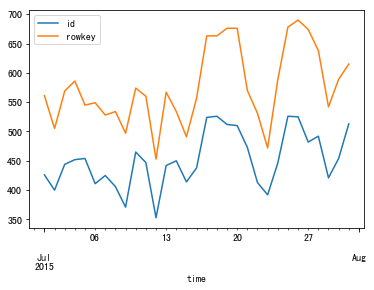

In [36]:
df_tg.plot()

In [37]:
df_tg.corr()

,id,rowkey
id,1.000000,0.936703
rowkey,0.936703,1.000000


In [38]:
g2 = ['id',pd.TimeGrouper('1D')]

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  if __name__ == '__main__':


In [39]:
df_ts = df_t.groupby(g2).agg({'rowkey':'nunique'})

In [42]:
df_ts.rowkey.value_counts().

1     11574
2      1773
3       401
4       121
5        56
6        25
8        12
7        12
9         6
12        6
10        6
13        3
11        3
30        2
16        1
24        1
15        1
17        1
35        1
14        1
19        1
Name: rowkey, dtype: int64

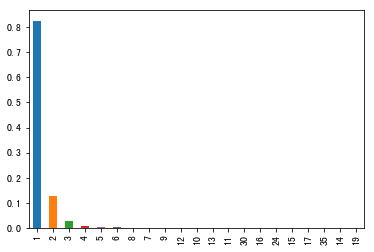

In [43]:
df_ts.rowkey.value_counts(normalize=True).iloc[:50].plot(kind='bar')